<a href="https://colab.research.google.com/github/PratikshaShelke24/ttteam_task/blob/main/session8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#session 8

In [ ]:
#Linear Regression Example – Predicting House Prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# 1. Create a sample dataset
data = {
    'Area': [650, 800, 1000, 1200, 1500, 1800, 2000, 2300, 2500, 2800],
    'Price': [70000, 85000, 100000, 120000, 150000, 180000, 200000, 230000, 250000, 280000]
}

In [3]:
#create data frame
dataset = pd.DataFrame(data)
print(dataset)

   Area   Price
0   650   70000
1   800   85000
2  1000  100000
3  1200  120000
4  1500  150000
5  1800  180000
6  2000  200000
7  2300  230000
8  2500  250000
9  2800  280000


In [4]:
# 2. Define independent (X) and dependent (Y) variables
X = dataset[['Area']]   # independent feature
Y = dataset['Price']    # dependent variable

In [5]:
# 3. Split data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [6]:
# 4. Train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [7]:
print("Intercept:", regressor.intercept_)
print("Coefficient:", regressor.coef_)

Intercept: 5105.125906609057
Coefficient: [97.63670443]


In [8]:
# 5. Predict prices
Y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print(df)


   Actual      Predicted
2  100000  102741.830332
8  250000  249196.886969


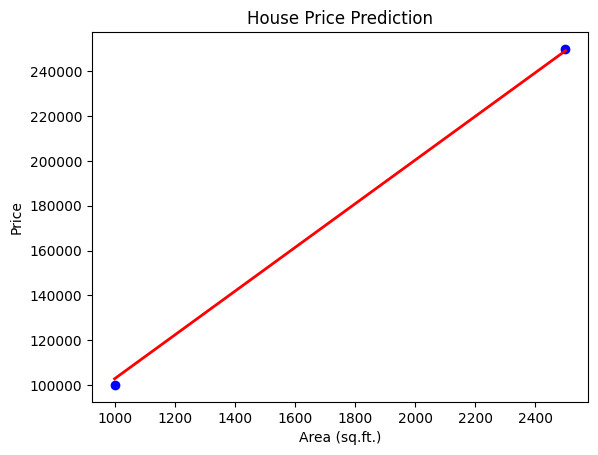

In [9]:
# 6. Visualize Actual vs Predicted
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.xlabel("Area (sq.ft.)")
plt.ylabel("Price")
plt.title("House Price Prediction")
plt.show()

In [10]:
# 7. Evaluate model
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 1772.471681199575
Mean Squared Error: 4081312.053908487
Root Mean Squared Error: 2020.225743304071


In [ ]:
#Logistic Regression Example Code

In [11]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix

In [12]:
# 1. Sample dataset
# --------------------------
data = {
    'Age': [22, 25, 47, 52, 46, 56, 48, 55, 60, 62],
    'EstimatedSalary': [15000, 29000, 52000, 72000, 70000, 81000, 61000, 95000, 79000, 67000],
    'Purchased': [0, 0, 1, 1, 1, 1, 1, 1, 1, 0]
}
df = pd.DataFrame(data)


In [13]:
# Split data into features (X) and target (y)
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [15]:
# 2. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0, 0.5, 'Estimated Salary')

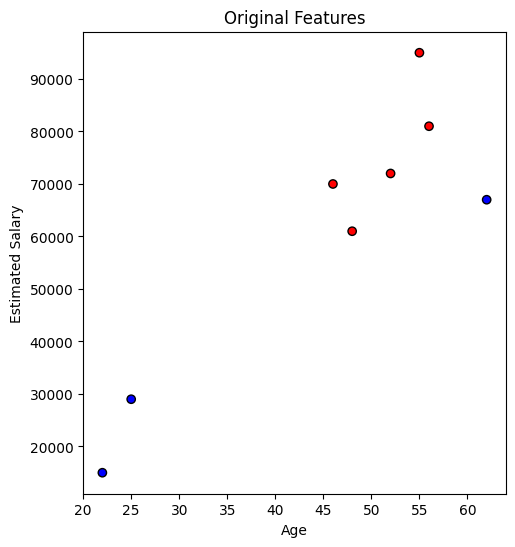

In [17]:
# Plot original vs scaled data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolor='k')
plt.title('Original Features')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

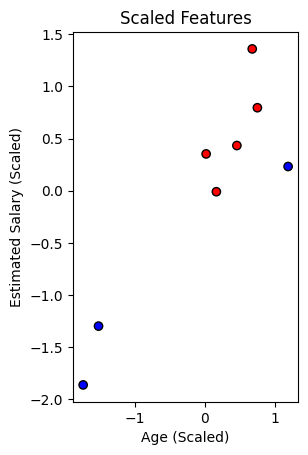

In [18]:
plt.subplot(1, 2, 2)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='bwr', edgecolor='k')
plt.title('Scaled Features')
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.show()

In [19]:
# 3. Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(),
    X_train_scaled, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:2180: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 4 instead of 5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklea

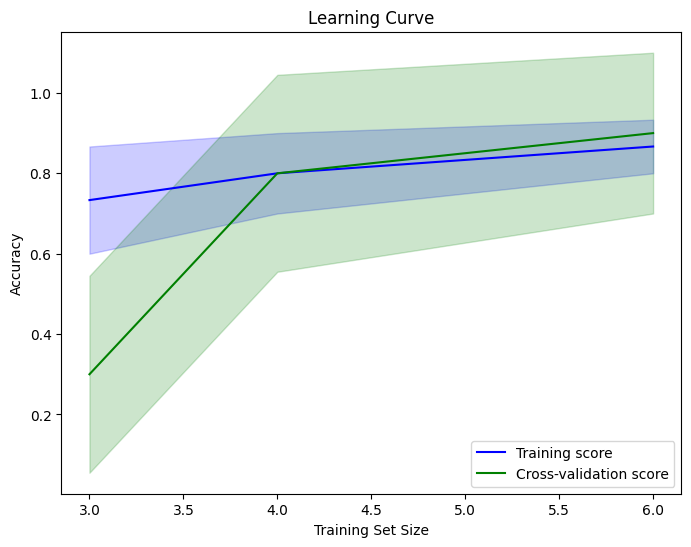

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="green")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()


In [21]:
# 4. Train the logistic regression model -
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test_scaled)[:, 1]



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


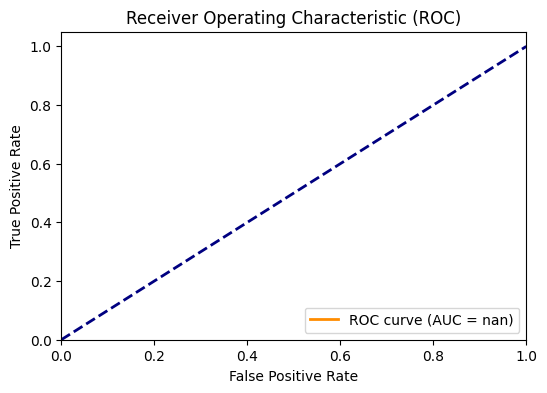

In [22]:
# 5. ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

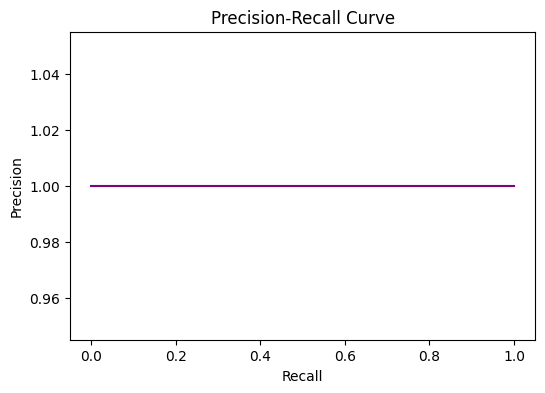

In [23]:
# 6. Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


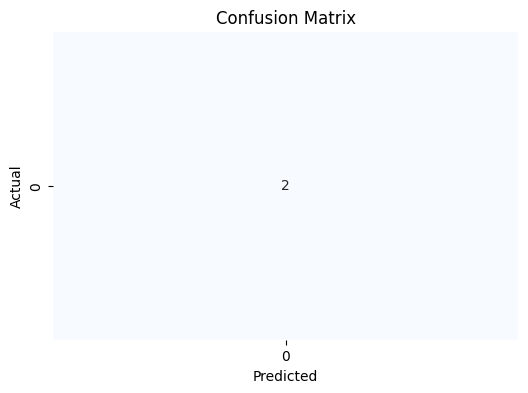

In [24]:
#7. Confusion Matrix
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()